In [1]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("superstore.csv", encoding='latin-1')

In [3]:
# Make sure date columns are parsed
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **1. Sales Analysis**

## **1.1 Total Sales by Year**

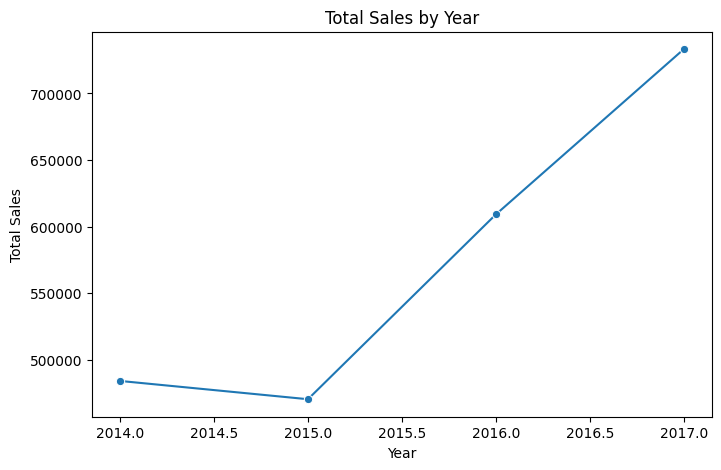

In [5]:
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=sales_by_year, x='Year', y='Sales', marker='o')
plt.title("Total Sales by Year")
plt.ylabel("Total Sales")
plt.show()


## **1.2 Sales by Category**

/tmp/ipython-input-1787989618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_cat, x='Category', y='Sales', palette="Blues_d")


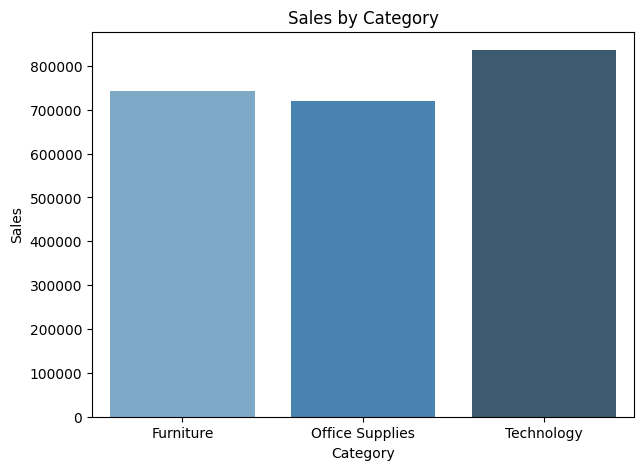

In [6]:
sales_by_cat = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=sales_by_cat, x='Category', y='Sales', palette="Blues_d")
plt.title("Sales by Category")
plt.show()


# **1.3 Sales by Region**

/tmp/ipython-input-2813850903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x='Region', y='Sales', palette="Greens_d")


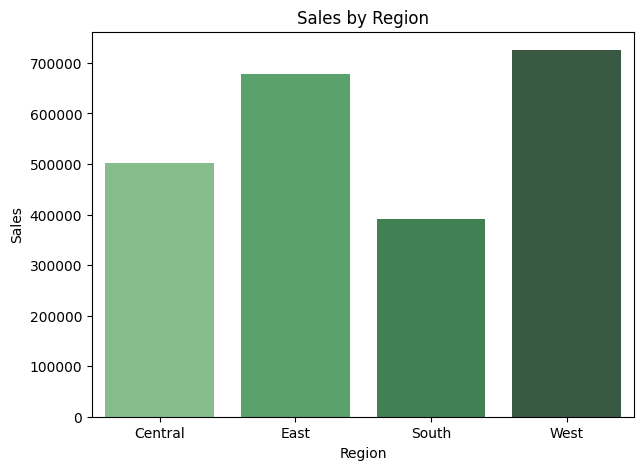

In [7]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=sales_by_region, x='Region', y='Sales', palette="Greens_d")
plt.title("Sales by Region")
plt.show()


# **2. Profitability Analysis**

## **2.1 Profit by Category**

/tmp/ipython-input-3778657362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_cat, x='Category', y='Profit', palette="Oranges_d")


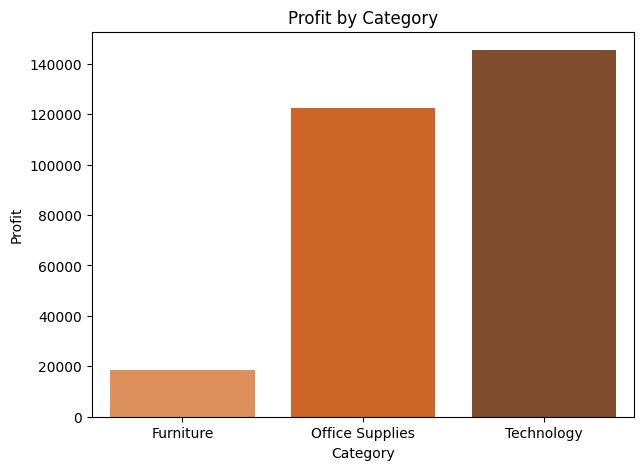

In [8]:
profit_by_cat = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=profit_by_cat, x='Category', y='Profit', palette="Oranges_d")
plt.title("Profit by Category")
plt.show()


## **2.2 Most Profitable Sub-Categories**

/tmp/ipython-input-2527647659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_profit, x='Profit', y='Sub-Category', palette="viridis")


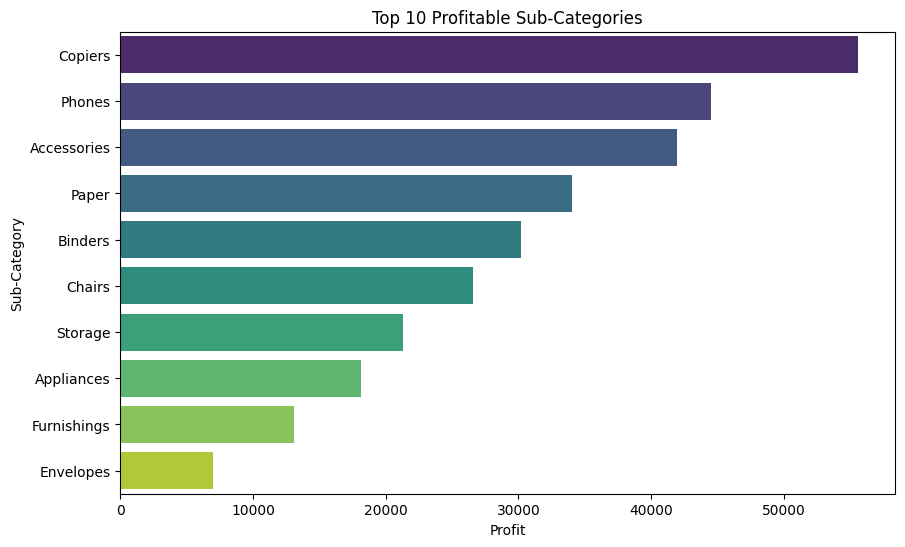

In [9]:
sub_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=sub_profit, x='Profit', y='Sub-Category', palette="viridis")
plt.title("Top 10 Profitable Sub-Categories")
plt.show()


## **2.3 Loss-Making Products**

/tmp/ipython-input-963726850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_products, x='Profit', y='Product Name', palette="Reds_d")


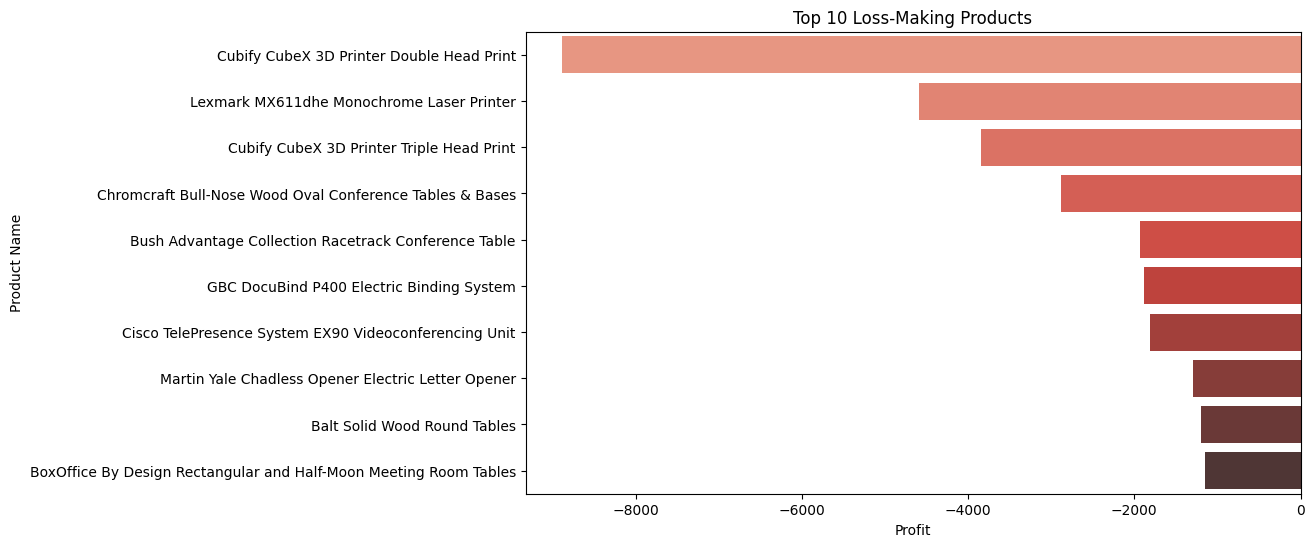

In [10]:
loss_products = df.groupby('Product Name')['Profit'].sum().reset_index()
loss_products = loss_products[loss_products['Profit'] < 0].sort_values(by='Profit').head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=loss_products, x='Profit', y='Product Name', palette="Reds_d")
plt.title("Top 10 Loss-Making Products")
plt.show()


# **3. Customer Insights**

## **3.1 Top Customers by Sales**

/tmp/ipython-input-1538713616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette="coolwarm")


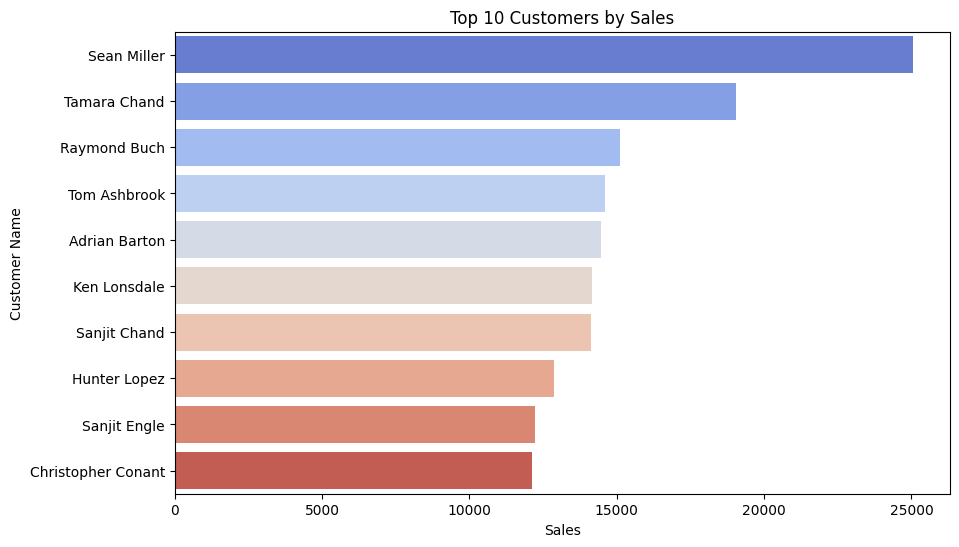

In [11]:
top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette="coolwarm")
plt.title("Top 10 Customers by Sales")
plt.show()


## **3.2 Repeat Customers**

/tmp/ipython-input-424144766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=repeat_customers, x='Total_Orders', y='Customer ID', palette="magma")


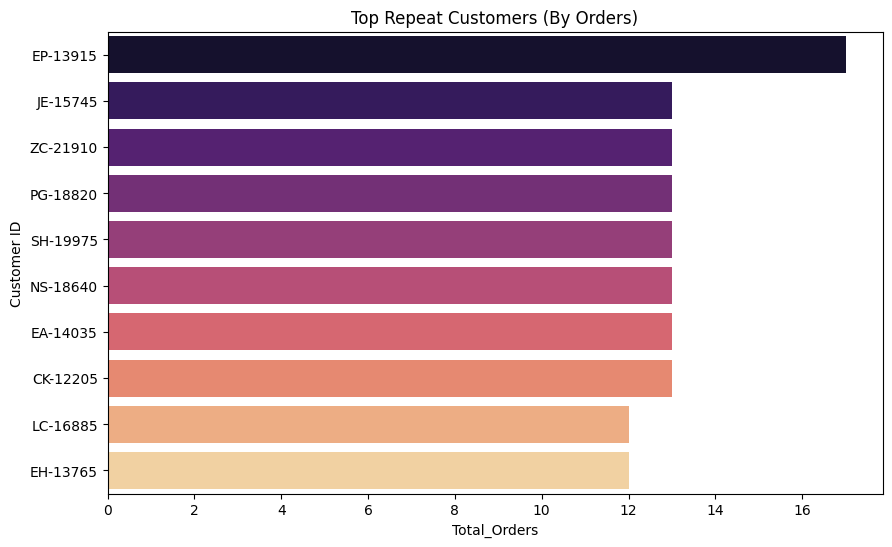

In [12]:
repeat_customers = df.groupby('Customer ID').agg(
    Total_Orders=('Order ID','nunique'),
    Total_Sales=('Sales','sum')
).reset_index()
repeat_customers = repeat_customers[repeat_customers['Total_Orders'] > 1].sort_values(by='Total_Orders', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=repeat_customers, x='Total_Orders', y='Customer ID', palette="magma")
plt.title("Top Repeat Customers (By Orders)")
plt.show()


## **3.3 Customer Lifetime Value**

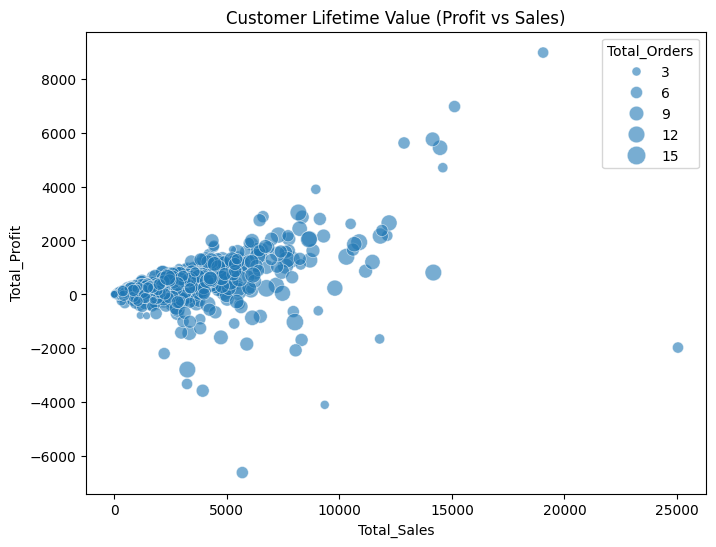

In [13]:
clv = df.groupby('Customer Name').agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum'),
    Total_Orders=('Order ID','nunique')
).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=clv, x='Total_Sales', y='Total_Profit', size='Total_Orders', alpha=0.6, sizes=(20,200))
plt.title("Customer Lifetime Value (Profit vs Sales)")
plt.show()


# **4. Discounts & Pricing**

## **4.1 Discount Impact**

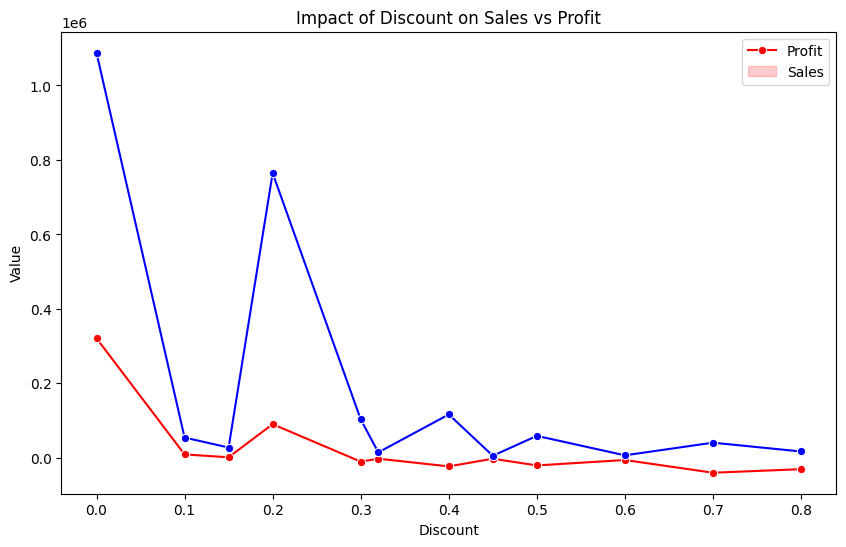

In [14]:
discount_impact = df.groupby('Discount').agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum')
).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=discount_impact, x='Discount', y='Total_Profit', marker='o', color="red")
sns.lineplot(data=discount_impact, x='Discount', y='Total_Sales', marker='o', color="blue")
plt.title("Impact of Discount on Sales vs Profit")
plt.ylabel("Value")
plt.legend(["Profit","Sales"])
plt.show()


# **5. Logistics & Operations**

## **5.1 Average Shipping Time by Ship Mode**




/tmp/ipython-input-1679816077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_time, x='Ship Mode', y='Ship_Days', palette="cubehelix")


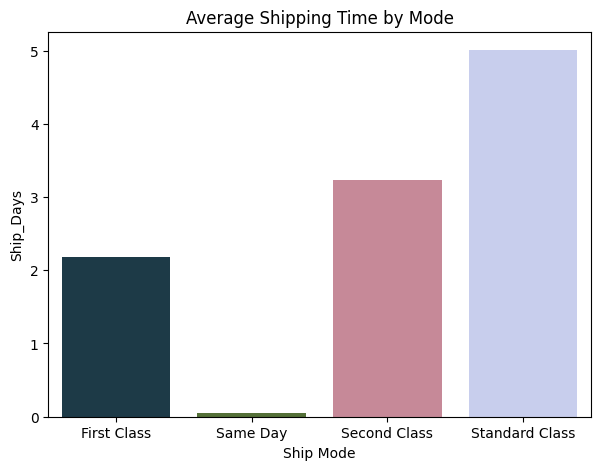

In [15]:
df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
ship_time = df.groupby('Ship Mode')['Ship_Days'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=ship_time, x='Ship Mode', y='Ship_Days', palette="cubehelix")
plt.title("Average Shipping Time by Mode")
plt.show()


## **5.2 Shipping Mode Profitability**

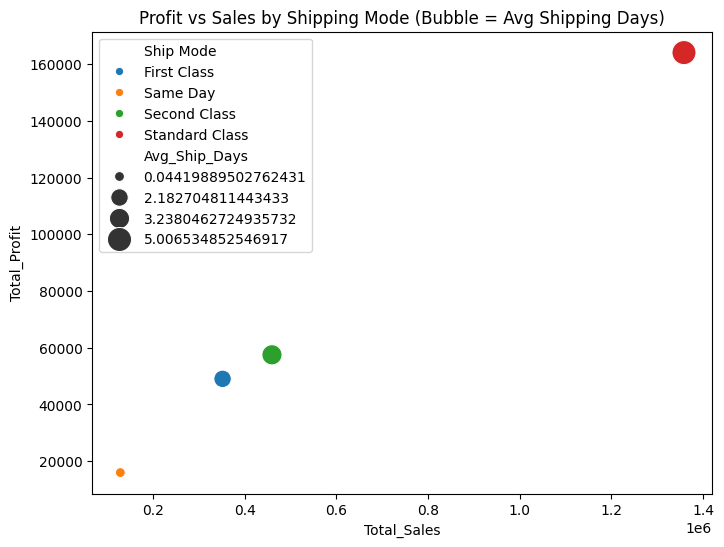

In [16]:
ship_profit = df.groupby('Ship Mode').agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum'),
    Avg_Ship_Days=('Ship_Days','mean')
).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=ship_profit, x='Total_Sales', y='Total_Profit', size='Avg_Ship_Days', hue='Ship Mode', sizes=(50,300))
plt.title("Profit vs Sales by Shipping Mode (Bubble = Avg Shipping Days)")
plt.show()


# **6. Regional Strategy**

## **6.1 Most Profitable States**

/tmp/ipython-input-2655495087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_profit, x='Profit', y='State', palette="cividis")


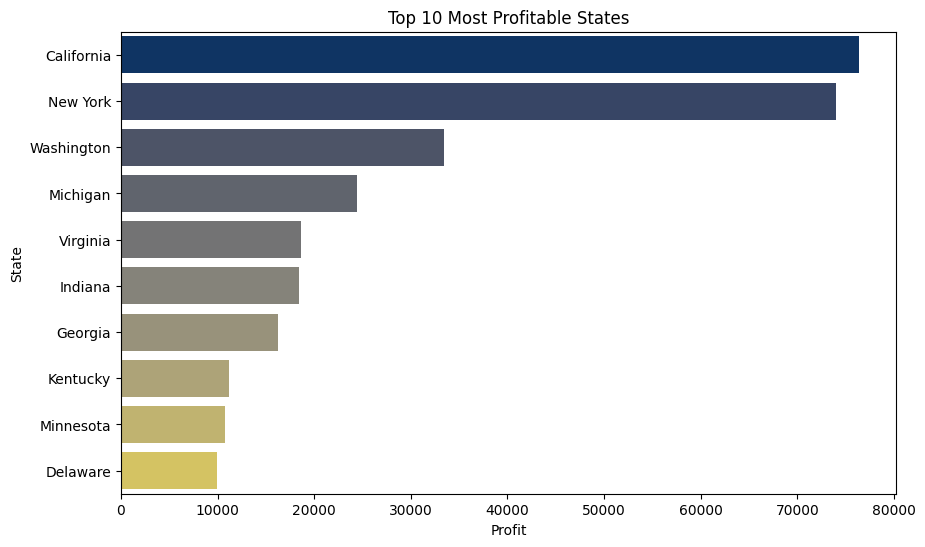

In [17]:
state_profit = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=state_profit, x='Profit', y='State', palette="cividis")
plt.title("Top 10 Most Profitable States")
plt.show()
